In [15]:
import pandas as pd
import json
from pathlib import Path

%pylab inline
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

from collections import (
    Counter,
    defaultdict
)

Populating the interactive namespace from numpy and matplotlib


In [16]:
data_path = Path('/users/gcmac/dropbox/delta-analytics/')
user_search_path = data_path/'data-19Jan2019'

# Search Data

In [17]:
user_searches = []
for file in user_search_path.iterdir():
    # skip tar extension files
    if str(file).split('.')[1] == 'tar':
        continue
    with open(file) as f:
        user_searches.append(json.loads(f.read()))

In [18]:
full_user_searches = []

for us in user_searches:
    full_user_searches.extend(us)

In [19]:
full_user_searches[0]['recentLookupCount']

[{'createdAt': '2012-01-02T15:14:29.101Z', 'wordstring': 'hasten'},
 {'createdAt': '2012-01-02T15:14:56.764Z', 'wordstring': 'hasten'}]

In [20]:
search_strings = []

for us in full_user_searches:
    word_list = [search['wordstring'].lower() for search in us['recentLookupCount']]
    search_strings.extend(word_list)

In [21]:
counts = Counter(search_strings)

In [30]:
search_tuples = []
for us in full_user_searches:
    search_tuples.extend([(us['_id'], search['wordstring'].lower()) for search in us['recentLookupCount'] ])

In [71]:
search_df = pd.DataFrame(search_tuples, columns=['user_id', 'word'])
search_df['dummy'] = 1

search_df = search_df.groupby(['user_id', 'word'])['dummy'].count()\
                     .to_frame().reset_index()
search_df['dummy'] = 1

In [73]:
top_n = 100
top_words = search_df.groupby('word')['user_id'].count().sort_values(ascending=False).index[:top_n]
top_users = search_df.groupby('user_id')['word'].count().sort_values(ascending=False).index[:top_n]

In [82]:
search_df.groupby('user_id')['word'].count().sort_values(ascending=False)

user_id
1159295    997
1003798    991
1160762    986
1109009    985
1138184    981
1108653    980
1046626    978
1052945    974
1100322    972
1082612    971
1103693    970
1073611    969
1132909    969
3          965
1054519    963
1022237    953
1028466    952
1084851    951
1110319    949
1159490    947
1082106    947
1114903    938
1110020    937
1093552    933
1101797    932
1097267    932
1094872    931
1022373    929
1063055    928
1059765    927
          ... 
1164046      1
1163950      1
1025704      1
1025703      1
1164000      1
1128077      1
1075209      1
1128076      1
1075223      1
1128046      1
1127988      1
1075307      1
1075380      1
1025578      1
1075458      1
1164209      1
1164060      1
1075610      1
1127793      1
1127782      1
1075723      1
1127759      1
1127758      1
1075742      1
1075771      1
1127729      1
1075878      1
1127681      1
1127629      1
1067281      1
Name: word, Length: 41574, dtype: int64

In [74]:
top_df = search_df[(search_df['user_id'].isin(top_users) & (search_df['word'].isin(top_words)))]

In [75]:
top_df.shape

(787, 3)

In [ ]:
p = search_df.pivot('user_id', 'word', 'dummy').fillna(0)

In [84]:
sys.getsizeof(search_df.pivot('user_id', 'word', 'dummy').fillna(0)) / 1e9

KeyboardInterrupt: 

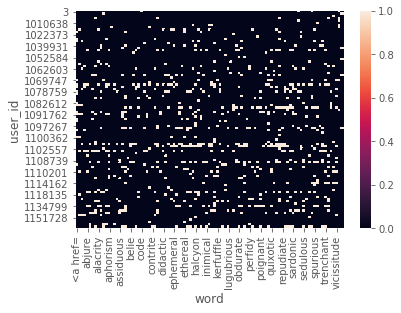

In [78]:
sns.heatmap(top_df.pivot('user_id', 'word', 'dummy').fillna(0))

In [67]:
search_df.shape

(1476935, 3)

In [59]:
search_df.sample(15)

,user_id,word,dummy
63185,1006022,sciolist,1
621701,1074786,odious,1
1114944,1110125,obsequious,1
64204,1006089,antonomasia,1
555625,1069435,swimmers,1
1304230,1130710,cherckered,1
874661,1095512,shirk,1
1095583,1109051,ottoman,1
1470591,1172309,laundering,1
769933,1085724,crossing,1


In [35]:
search_df['user_id'].nunique()

41574

In [36]:
search_df['word'].nunique()

341910

In [33]:
search_df.shape

(1910836, 2)

In [24]:
full_user_searches[0]

{'_id': 1080001,
 'recentLookupCount': [{'createdAt': '2012-01-02T15:14:29.101Z',
   'wordstring': 'hasten'},
  {'createdAt': '2012-01-02T15:14:56.764Z', 'wordstring': 'hasten'}],
 'recentLookups': 2}

In [22]:
counts.most_common(100)

[('undefined', 2224),
 ('wordnik', 1646),
 ('code', 1490),
 ('vituperative', 1303),
 ('dictionary', 1100),
 ('altruism', 1028),
 ('scrabble', 1009),
 ('love', 968),
 ('cat', 910),
 ('<a href=', 899),
 ('serendipity', 893),
 ('alacrity', 891),
 ('laconic', 875),
 ('obsequious', 862),
 ('capricious', 839),
 ('zeitgeist', 821),
 ('diaphanous', 818),
 ('sanguine', 815),
 ('ephemeral', 792),
 ('inchoate', 791),
 ('egregious', 763),
 ('desultory', 761),
 ('esoteric', 752),
 ('quixotic', 751),
 ('comprehensive', 746),
 ('abate', 741),
 ('lugubrious', 741),
 ('gre', 740),
 ('main', 734),
 ('mellifluous', 704),
 ('recondite', 698),
 ('obstreperous', 691),
 ('abjure', 664),
 ('schadenfreude', 662),
 ('perfunctory', 657),
 ('pernicious', 657),
 ('erudite', 646),
 ('abase', 645),
 ('ubiquitous', 641),
 ('reticent', 638),
 ('facetious', 628),
 ('fastidious', 613),
 ('ennui', 606),
 ('prosaic', 606),
 ('new interface', 606),
 ('assuage', 602),
 ('adumbrate', 596),
 ('abstruse', 595),
 ('truculent', 

In [47]:
len(search_strings)

1910836

In [20]:
len(full_user_searches)

41574

In [35]:
n_searches = np.array(sorted([us['recentLookups'] for us in full_user_searches]))

In [30]:
import math
pct = .5
idx = math.floor(len(n_searches) * pct)
n_searches[idx]

In [60]:
import pandas as pd

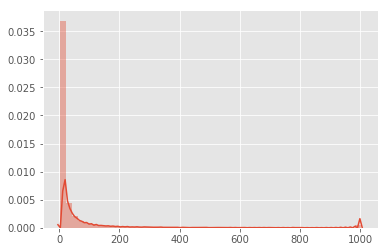

In [26]:
sns.distplot(n_searches)

# List Data

In [69]:
list_path = data_path/'data-06Jan2019'/'word_lists-06Jan2019'
json_string = "[" + ','.join([l.strip() for l in open(list_path).readlines()]) + "]"

In [71]:
list_data = json.loads(json_string)

In [83]:
Counter([type(ld['numberWordsInList']) for ld in list_data])

Counter({dict: 45127, int: 2})

In [87]:
list_len = [int(ld['numberWordsInList']['$numberLong']) 
            for ld in list_data if isinstance(ld['numberWordsInList'], dict)]
list_len = np.array(list_len)

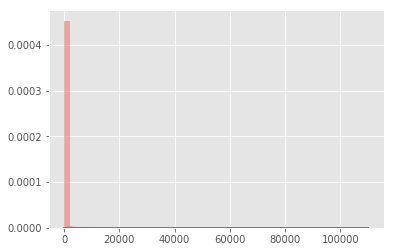

In [86]:
sns.distplot(list_len)

In [96]:
word_list_path = data_path/'data-06Jan2019'/'listed_words-06Jan2019'
json_string = "[" + ','.join([l.strip() for l in open(word_list_path).readlines()]) + "]"
wl_data = json.loads(json_string)
json_string = None

In [104]:
word_lists = defaultdict(list)

for wld in wl_data:
    word_lists[int(wld['wordListId']['$numberLong'])].append(wld['lcword'])

In [111]:
len(word_lists.keys())

39658

In [106]:
word_lists = {list_id:set(words_in_list) for list_id, words_in_list in word_lists.items()}

In [107]:
word_lists[170]

{'drool',
 'knit',
 'meshuggeneh',
 'oomph',
 'reconciliation',
 'recur',
 'ridiculous',
 'serendipity',
 'special'}

In [109]:
len(word_lists[170])

9

In [110]:
def jaccard_sim(set1, set2):
    return len(set1.intersection(set2)) / len(set1.union(set2))

In [112]:
from multiprocessing import Pool

In [150]:
list_id = np.random.choice(list(word_lists.keys()), 1)[0]

In [151]:
sims = {}
for i,lid in enumerate(word_lists.keys()):
    if lid != list_id:
        sims[lid] = jaccard_sim(word_lists[list_id], word_lists[lid])

In [152]:
word_lists[list_id]

{'aberrant',
 'abet',
 'abject',
 'ablution',
 'abstruse',
 'acclivity',
 'acerbic',
 'admonish',
 'adroit',
 'affluent'}

In [153]:
pd.Series(sims).sort_values(ascending=False)

501037    0.166667
419073    0.153846
507020    0.142857
414006    0.115385
377051    0.113636
33445     0.111111
570005    0.111111
245011    0.102564
26508     0.100000
2313      0.100000
487016    0.100000
349016    0.100000
16511     0.100000
16126     0.100000
339003    0.100000
451134    0.100000
342025    0.100000
461008    0.100000
25878     0.100000
272017    0.100000
3597      0.095238
448170    0.090909
437079    0.090909
8932      0.090909
7478      0.090909
368062    0.090909
385070    0.090909
633097    0.090909
366033    0.086957
12072     0.083333
            ...   
32453     0.000000
32452     0.000000
32451     0.000000
32450     0.000000
32449     0.000000
32448     0.000000
32447     0.000000
32446     0.000000
32445     0.000000
32444     0.000000
32462     0.000000
32464     0.000000
32482     0.000000
32465     0.000000
32481     0.000000
32480     0.000000
32479     0.000000
32478     0.000000
32477     0.000000
32476     0.000000
32475     0.000000
32474     0.

In [157]:
word_lists[570005]

{'abstruse',
 'acerbic',
 'burgeon',
 'espouse',
 'forlorn',
 'hackneyed',
 'laudable',
 'pedantic',
 'provincial',
 'underscore'}

In [135]:
word_lists[list_id]

{'adulatory',
 'calumny',
 'dogma',
 'implicit',
 'manifest',
 'obtuse',
 'penitent',
 'perspicacious',
 'sagacious',
 'verisimilitude'}